In [4]:
%%capture
%run full_data.ipynb

In [5]:
import sys 
sys.path.append('..')
import portfolios as p

import matplotlib.pyplot as plt
import numpy as np

In [6]:
assigned_data_5 = pd.read_csv('assigned_data_5_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_10 = pd.read_csv('assigned_data_10_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_20 = pd.read_csv('assigned_data_20_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_50 = pd.read_csv('assigned_data_50_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')

In [8]:
rets_5 = p.portfolios_returns_mean_table(assigned_data_5,'LRET_1',5)
rets_10 = p.portfolios_returns_mean_table(assigned_data_10,'LRET_1',10)
rets_20 = p.portfolios_returns_mean_table(assigned_data_20,'LRET_1',20)
rets_50 = p.portfolios_returns_mean_table(assigned_data_50,'LRET_1',50)

../portfolios.py:176: RuntimeWarning: Mean of empty slice.
  returns[i] = p_data[ret].values.mean()
/home/jaakko/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
rets_5_p = rets_5[10:].sort_index()
rets_10_p = rets_10[10:].sort_index()
rets_20_p = rets_20[10:].sort_index()
rets_50_p= rets_50[10:].sort_index()

In [10]:
means_10 = rets_10_p.mean().values * 100
ports_10 = list(map(lambda x: str(x), range(1,11)))
ports_10[0] = 'Losers'
ports_10[-1] = 'Winners'

Text(0, 0.5, 'Monthly mean return')

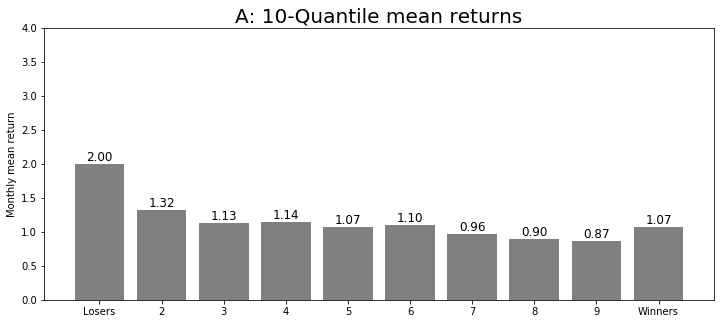

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
plot = plt.bar(ports_10,means_10,color='grey')

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%.2f' % round(height,2),fontsize=12,ha='center', va='bottom')

plt.title('A: 10-Quantile mean returns',fontsize=20)
plt.ylim((0,4))
plt.ylabel('Monthly mean return')

In [12]:
means_20 = rets_20_p.mean().values * 100
ports_20 = list(map(lambda x: str(x), range(1,21)))
ports_20[0] = 'L'
ports_20[-1] = 'W'

Text(0, 0.5, 'Monthly mean return')

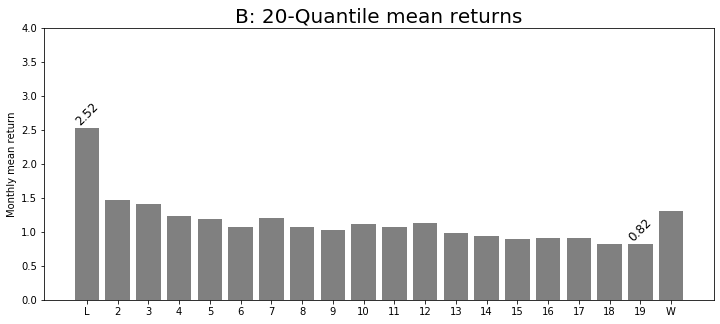

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
plot = plt.bar(ports_20,means_20,color='grey')

for value in plot:
    height = value.get_height()
    if (height <= means_20.min() or height >= means_20.max()):
        plt.text(value.get_x() + value.get_width()/2.,
                1.002*height,'%.2f' % round(height,2), rotation=45,fontsize=12,ha='center', va='bottom')

plt.title('B: 20-Quantile mean returns',fontsize=20)
plt.ylim((0,4))
plt.ylabel('Monthly mean return')

In [14]:
means_50 = rets_50_p.mean().values * 100
ports_50 = list(map(lambda x: str(x), range(1,51)))
ports_50[0] = 'L'
ports_50[-1] = 'W'

Text(0, 0.5, 'Monthly mean return')

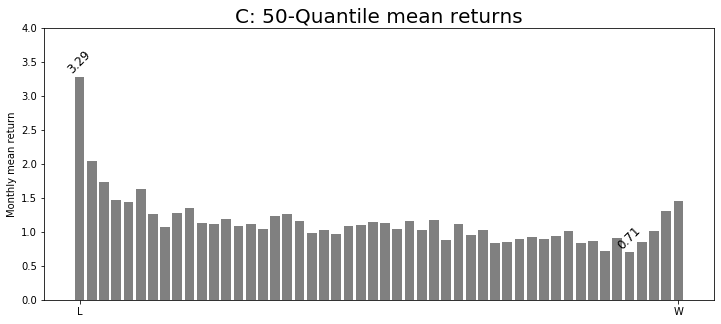

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
plot = plt.bar(ports_50,means_50,color='grey')

for value in plot:
    height = value.get_height()
    if (height < 0.719 or height >= means_20.max()):
        plt.text(value.get_x() + value.get_width()/2.,
                1.002*height,'%.2f' % round(height,2), rotation=45,fontsize=12,ha='center', va='bottom')

plt.title('C: 50-Quantile mean returns',fontsize=20)
plt.xticks(np.arange(0, 60, step=49))
plt.ylim((0,4))
plt.ylabel('Monthly mean return')